In [6]:
import math
import os
import time
import matplotlib.pyplot as plt
import numpy as np
import ot as pot
import torch
import time
import pprint
import matplotlib.pyplot as plt
import normflows as nf
import torchcfm
from sklearn.decomposition import PCA
from scipy.stats import wasserstein_distance
from matplotlib import pyplot as plt
from torch import nn
from tqdm import tqdm
import torchdyn
from torchdyn.core import NeuralODE
from torchdyn.datasets import generate_moons
from torch.utils.data import Dataset, TensorDataset, DataLoader, random_split
from torchcfm.conditional_flow_matching import *
from torchcfm.models.models import *
from torchcfm.utils import *

In [7]:
import utils
import cnfhelp
#import importlib
#importlib.reload(utils)
#importlib.reload(cnfhelp)

In [8]:
class args:
    dataset_limiter = 100000
    filepath = 'array3.txt'
    split = np.array([0.8, 0.1, 0.1])
    batch_size = 512
    bounds = np.array([-3, 3, -3, 3])
    lr = 5e-4
    w = 256
    dim = 10
    sigma = 0.1
    model_style = 'ConditionalFlowMatcher'

In [9]:
train_loader, train_np, valid_np, test_np = cnfhelp.preprocess_samples(args.filepath, args.split, args.batch_size, args.dataset_limiter)
model, FM, base = cnfhelp.init_model(args.dim, args.w, args.sigma, args.model_style)
pca = PCA(n_components=2)
trainingpca = pca.fit_transform(train_np)
generated_testing, info = cnfhelp.train_and_sample(model, FM, base, train_loader, valid_np, test_np, pca, args.bounds, args.lr)
pprint.pprint(info)

{'Architecture': 'CNF',
 'Dimensions': 10,
 'Final KLD': 97.62376479460858,
 'Final WD': 0.006288888888888875,
 'Iterations': 19,
 'Learnable parameters': 137226,
 'Speed (samples/s)': 415.8343312369558,
 'Training data amount': 80000}


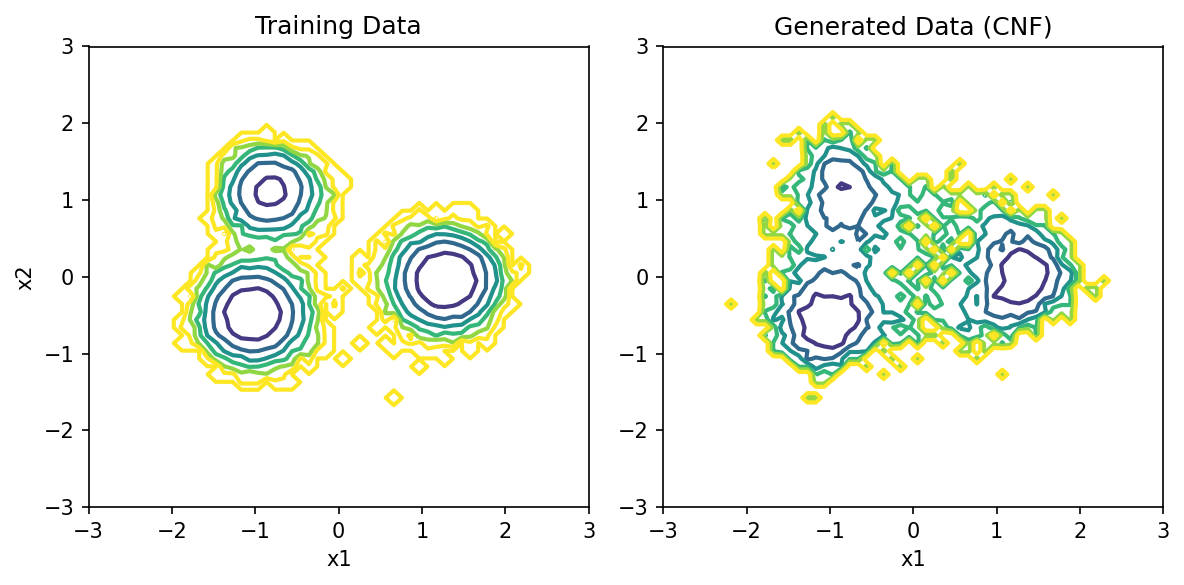

In [10]:
G_MD, xe_MD, ye_MD = utils.FE_hist(trainingpca, args.bounds, binw=0.1)
G_NF, xe_NF, ye_NF = utils.FE_hist(pca.transform(generated_testing), args.bounds, binw=0.1)

fig, axs = plt.subplots(1,2, figsize=(8,4), dpi=150, tight_layout=True);
axs[0].contour(G_MD.T, extent=[xe_MD[0], xe_MD[-1], ye_MD[0], ye_MD[-1]],
        linewidths=2, vmin = 0, vmax = 6)
axs[1].contour(G_NF.T, extent=[xe_NF[0], xe_NF[-1], ye_NF[0], ye_NF[-1]],
        linewidths=2, vmin = 0, vmax = 6)
axs[0].set_xlabel("x1")
axs[0].set_ylabel("x2")
axs[0].set_title("Training Data")
axs[1].set_xlabel("x1")
axs[1].set_title("Generated Data (CNF)")
axs[0].set_xlim(args.bounds[0], args.bounds[1]);
axs[0].set_ylim(args.bounds[2], args.bounds[3]);
axs[1].set_xlim(args.bounds[0], args.bounds[1]);
axs[1].set_ylim(args.bounds[2], args.bounds[3]);